# Exercise - Multivariate Regression with the Boston Housing Data set

The dataset contains prices of houses(MEDV) in Boston City(USA) based on various parameters. The dataset is available at https://www.kaggle.com/vikrishnan/boston-house-prices/data.
We have to predict the house prices based on the variables provided in the dataset. 

### The first step is analysis of the data. Plot & answer the following questions regarding the data.

1. Determine if there any values missing in any rows/columns. Filter out such rows. 
2. Find out the correlation of this dataset using pandas. Plot a heatmap of this matrix. Which features have a higher correlation with MEDV? Are there any features which are correlated with other features? What are those? 
2. Plot different scatter plots of all feature variables with MEDV. Observe trends based on the plots. Which features are more likely to give a precise value for MEDV?

### With the analysis done above of the dataset, remove the columns which are not likely to predict MEDV. Perform Linear regression on this new filtered dataset. 
1. Perform a 80:20 split with the train_test_split function, with random_state=0. Perform linear regression on the training dataset. Print the obtained co-efficients for every feature. Which features have more weightage? 
2. Plot a scatter of test prices vs obtained prices. Obtain the MSE, R^2 score of this model. 

### With the original dataset, i.e with all the features, perform the above steps again. Which model gives you a better accuracy?


In [1]:
import pandas as pd

In [2]:
#read csv
cols = ['CRIM', "ZN", "INDUS", "CHAS", "NOX", "RM" , "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
df = pd.read_csv('./data/housing.csv', names=cols, header=None)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
df.isnull().sum()

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
MEDV       54
dtype: int64

In [4]:
df=df.dropna(subset=['MEDV'])

In [5]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.281239,0.573822,0.050066,0.636941,-0.142458,0.447664,-0.461967,0.897988,0.825668,0.319470,-0.413014,0.424789,-0.286245
ZN,-0.281239,1.000000,-0.514273,-0.059697,-0.500729,0.306623,-0.555679,0.656152,-0.266606,-0.269446,-0.364122,0.150380,-0.411165,0.331570
INDUS,0.573822,-0.514273,1.000000,0.103016,0.738517,-0.364895,0.605982,-0.669362,0.513306,0.673312,0.317336,-0.316752,0.565402,-0.411915
CHAS,0.050066,-0.059697,0.103016,1.000000,0.134064,0.076580,0.123141,-0.140662,0.057337,0.016894,-0.099623,0.013415,-0.009430,0.154409
NOX,0.636941,-0.500729,0.738517,0.134064,1.000000,-0.264594,0.707148,-0.745812,0.542499,0.615120,0.103464,-0.358433,0.536824,-0.332778
RM,-0.142458,0.306623,-0.364895,0.076580,-0.264594,1.000000,-0.187871,0.138774,-0.095931,-0.214948,-0.334164,0.108352,-0.607289,0.740181
AGE,0.447664,-0.555679,0.605982,0.123141,0.707148,-0.187871,1.000000,-0.720334,0.359326,0.427095,0.192956,-0.223765,0.573266,-0.299893
DIS,-0.461967,0.656152,-0.669362,-0.140662,-0.745812,0.138774,-0.720334,1.000000,-0.388385,-0.444131,-0.152253,0.234449,-0.423725,0.138798
RAD,0.897988,-0.266606,0.513306,0.057337,0.542499,-0.095931,0.359326,-0.388385,1.000000,0.872876,0.387484,-0.352586,0.309788,-0.217902
TAX,0.825668,-0.269446,0.673312,0.016894,0.615120,-0.214948,0.427095,-0.444131,0.872876,1.000000,0.384511,-0.367084,0.410927,-0.345898


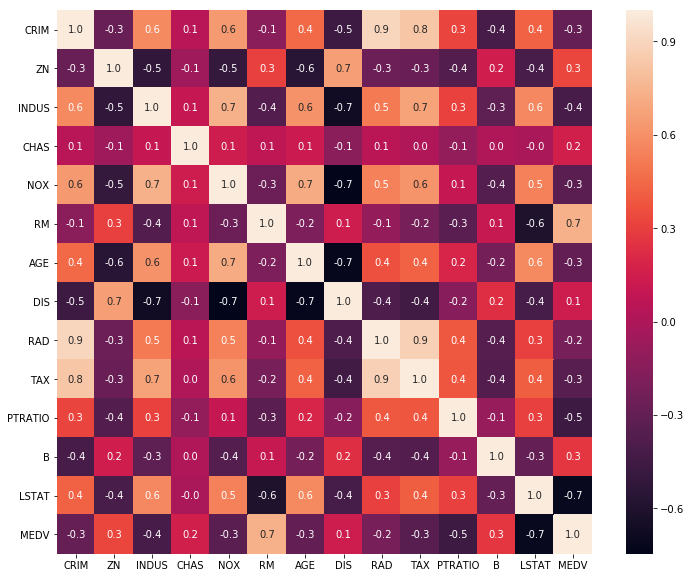

In [14]:
import matplotlib.pyplot as plt
import seaborn as sb
plt.figure(figsize=(12,10))
sb.heatmap(df.corr(),annot=True,fmt='.1f')

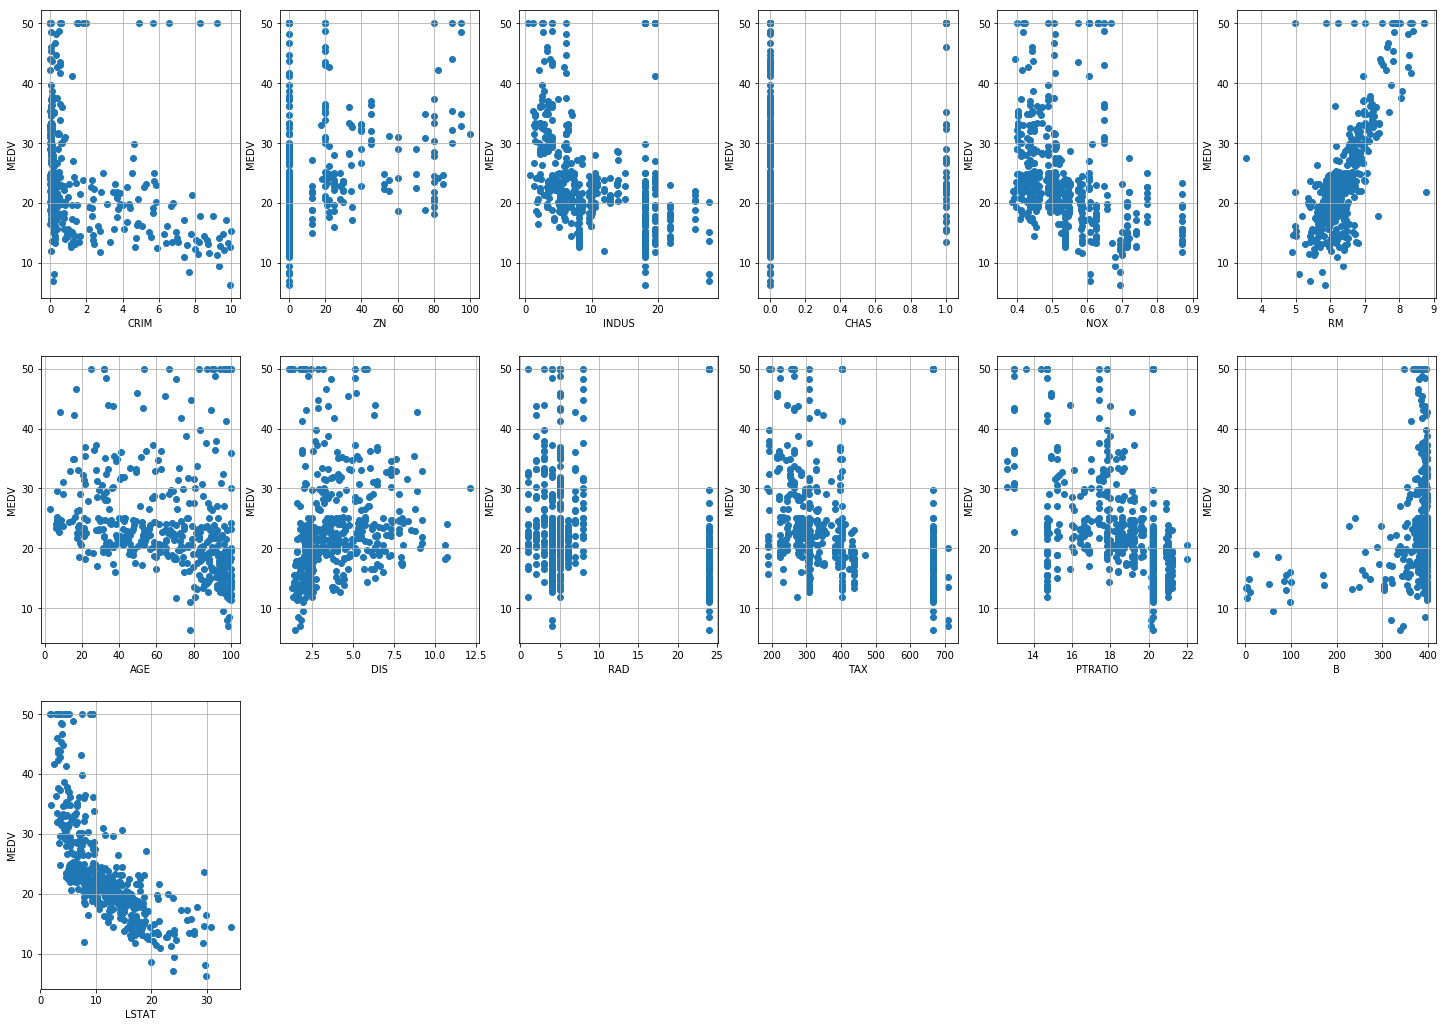

In [7]:
plt.figure(figsize=(25,18))
for i in range(1,14):
    plt.subplot(3,6,i)
    plt.scatter(df[cols[i-1]],df['MEDV'])
    plt.xlabel(cols[i-1])
    plt.ylabel("MEDV")
    plt.grid()

In [8]:
from sklearn.model_selection import train_test_split

x=df[["INDUS","NOX", "RM" , "AGE", "PTRATIO", "LSTAT"]]
y=df["MEDV"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)


In [9]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
print(y_test)
lm.predict(x_test)

337    18.5
110    21.7
276    33.2
498    21.2
222    27.5
74     24.1
292    27.9
342    16.5
228    46.7
188    29.8
396    12.5
192    36.4
21     19.6
154    17.0
244    17.6
61     16.0
457    13.5
257    50.0
286    20.1
490     8.1
22     15.2
213    28.1
220    26.7
202    42.3
329    22.6
264    36.5
221    21.7
200    32.9
198    34.6
147    14.6
       ... 
237    31.5
90     22.6
382    11.3
3      33.4
290    28.5
211    19.3
235    24.0
502    20.6
242    22.2
499    17.5
38     24.7
281    35.4
27     14.8
241    20.1
126    15.7
304    36.1
141    14.4
253    42.8
87     22.2
35     18.9
450    13.4
47     16.6
458    14.9
70     24.2
128    18.0
439    12.8
285    22.0
230    24.3
340    18.7
100    27.5
Name: MEDV, Length: 91, dtype: float64


array([20.09606732, 18.90089816, 32.36227039, 19.95047266, 28.9566015 ,
       23.87237945, 27.55606441, 28.41908195, 34.22810707, 30.99096125,
       17.52422254, 35.18835369, 18.84484465, 23.55947927, 19.41901851,
       20.03548118, 16.13131556, 45.31363754, 20.63455423,  4.10660195,
       16.11715353, 23.59866084, 30.06587074, 37.04470738, 25.50696828,
       35.92615953, 17.37492116, 31.5794643 , 35.83498111,  6.62279673,
       17.0189658 , 21.46708084, 20.56151534, 30.4731567 , 25.81090265,
       39.1945454 , 13.01032027,  2.23691129, 23.31583046, 24.32317749,
       33.2518486 , 35.50898216, 26.84856701, 16.89593659, 27.96947098,
       20.07376368, 26.63995199, 24.48277305, 19.83897731, 20.14460449,
       18.43518627, 16.5450296 , 35.02554072, 22.04513032, 25.93998022,
       29.6451692 , 25.04460339, 19.49421438, 32.1517019 , 14.01364097,
       21.94507721, 34.95160724, 26.53525623, 10.2067624 , 32.06637098,
       29.9829764 , 10.73507909, 23.45031138, 22.53366999, 25.07

In [11]:
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(y_test,lm.predict(x_test))
print("SGD MSE ->",mse)

SGD MSE -> 24.655085285771683


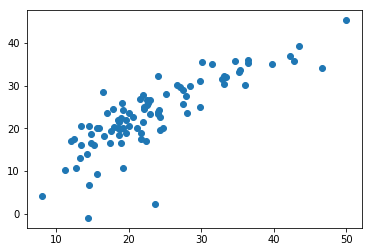

In [12]:
plt.figure()
plt.scatter(y_test,lm.predict(x_test))

In [13]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,lm.predict(x_test))
print(r2)

0.6596067078150831
